<font color='red'>No se aceptan soluciones que usen metodologías distintas a la vista en clases.</font>


# 1) Ingrese su Nombre y Número de alumno/a

(1 Punto)

In [90]:
Nombre = "Jessica Yanín Hormazábal Pardo"
ID     = "15639150"

print('IMPORTANTE: Cambie el nombre del archivo (arriba-izquierda) por '+ID+'.ipynb')

IMPORTANTE: Cambie el nombre del archivo (arriba-izquierda) por 15639150.ipynb


# 2) Importe las Librerías

(1 Punto)

*Todas las librerías de este código deben ir en esta celda. Sólo está permitido usar las librerías de los ejemplos vistos en clase.*



In [91]:
 # PREGUNTA 2: ESCRIBA CODIGO AQUI
import numpy as np
from  cv2 import imread
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# 3) Cargue la Imagen de los Frutos Rojos

(1 Punto)

*Lea erchivo de la imagen se encuentra en este link:*

`https://www.dropbox.com/s/5kkrnttmlt9wbdm/frutos_rojos.png`



In [92]:
 # PREGUNTA 3: ESCRIBA CODIGO AQUI
 !wget https://www.dropbox.com/s/5kkrnttmlt9wbdm/frutos_rojos.png

--2021-08-26 11:57:54--  https://www.dropbox.com/s/5kkrnttmlt9wbdm/frutos_rojos.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/5kkrnttmlt9wbdm/frutos_rojos.png [following]
--2021-08-26 11:57:54--  https://www.dropbox.com/s/raw/5kkrnttmlt9wbdm/frutos_rojos.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd70974dc3aad28d860e7852d21.dl.dropboxusercontent.com/cd/0/inline/BU-K_a6yYhbpz-w39Wafvg7E-IdUSvBUy0yPdUu3nWWoz0R8b5SjYqrum4EO7uddYE4qJ11ilFbrTG8bItqXTM1VHOzNaHocNFMwAXIoF0Frq-Gt3TLG0A4AOHXz8kwbnASJ8b7yG8nDyldQ9EtjiGfu/file# [following]
--2021-08-26 11:57:54--  https://ucd70974dc3aad28d860e7852d21.dl.dropboxusercontent.com/cd/0/inline/BU-K_a6yYhbpz-w39Wafvg7E-IdUSvBUy0yPdUu3nWWoz0R8b5SjYqrum4EO7uddYE4qJ11ilFbrTG

# 4) Despliegue la imagen cargada y su tamaño
(1 Punto)


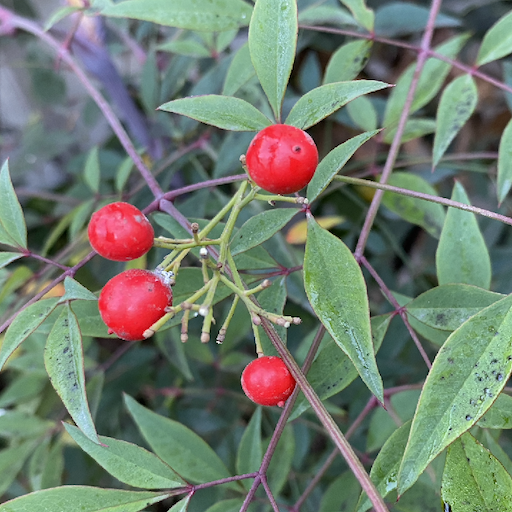

size =  (512, 512, 3)
max =  255
min =  0


In [93]:
 # PREGUNTA 4: ESCRIBA CODIGO AQUI

 def howis(img):
   print("size = ", img.shape)
   print("max = ", np.max(img))
   print("min = ", np.min(img))

berrys = imread('frutos_rojos.png')
cv2_imshow(berrys)
howis(berrys)

# 5) Despliegue los canales R,G,B

(1 Punto)


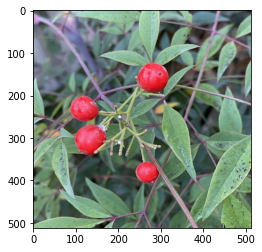

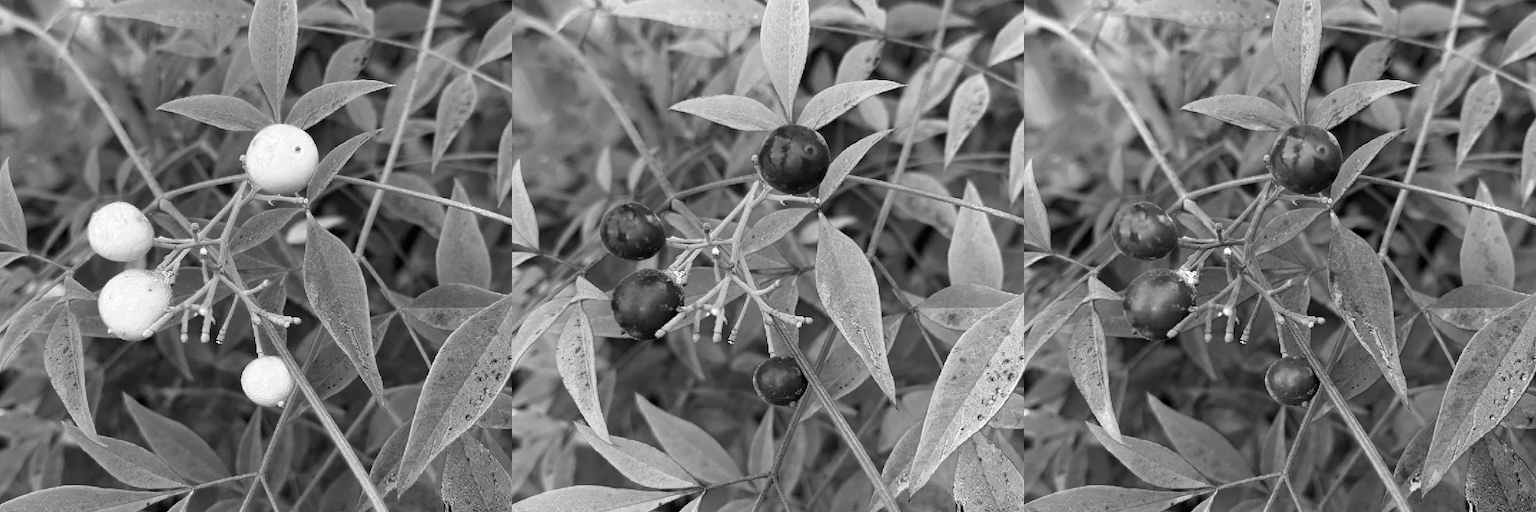

In [94]:
 # PREGUNTA 5: ESCRIBA CODIGO AQUI
 I = berrys[:,:,[2,1,0]] # Así podemos elegir bien en el orden RGB
 plt.imshow(I)
 plt.show() # Con esto nos aseguramos que funcione la transformación BGR a GRB

 R = I[:,:,0]
 G = I[:,:,1]
 B = I[:,:,2]
 RGB = np.concatenate((R,G,B), axis=1)
 cv2_imshow(RGB)

# 6) Segmente los frutos rojos

(6 Puntos)



In [95]:
 # PREGUNTA 6: ESCRIBA CODIGO AQUI
 

In [96]:
# Defino la función de segmentación entregada en clases
def segmenta(X,t):
  (N,M) = X.shape
  Y = np.zeros((N,M))
  for i in range(N):
    for j in range(M):
      if X[i,j] > t:
        Y[i,j] = 255
  return Y


Aprovechar la separación de la imagen original en los 3 canales para verificar si al segmentar cada una por separado se logran definir diferentes partes de la imágen:

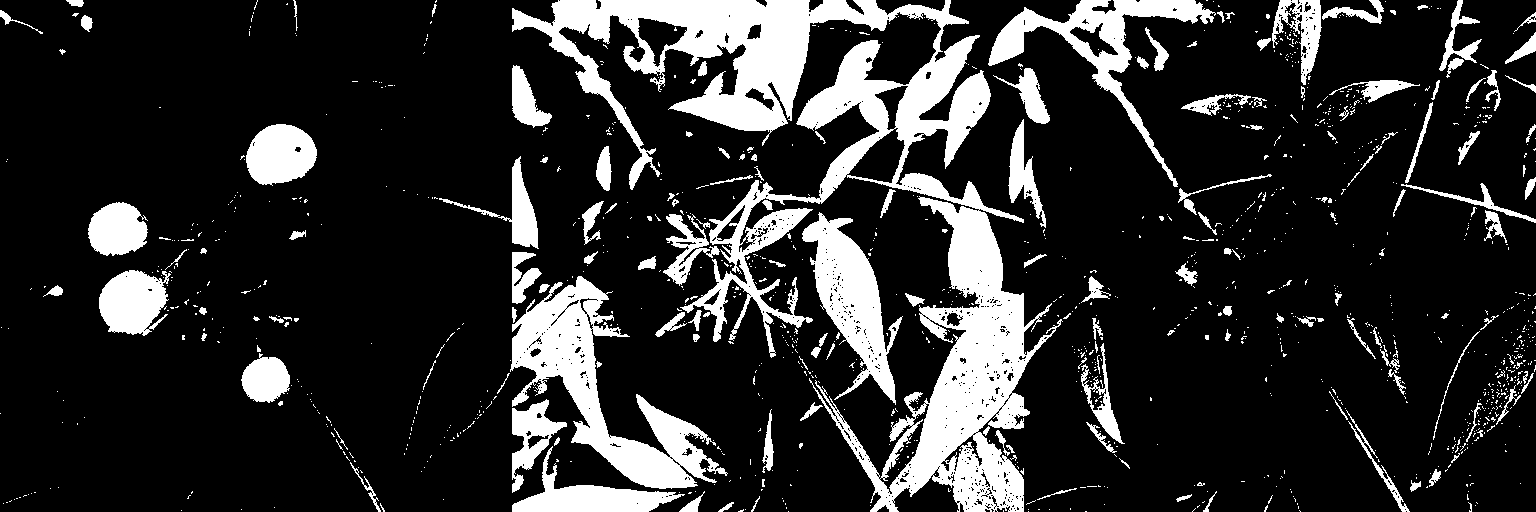

In [97]:

Seg_R = segmenta(R, 200)
Seg_G = segmenta(G, 140)
Seg_B = segmenta(B, 170)
SEG_RGB = np.concatenate((Seg_R,Seg_G, Seg_B), axis=1)
cv2_imshow(SEG_RGB)

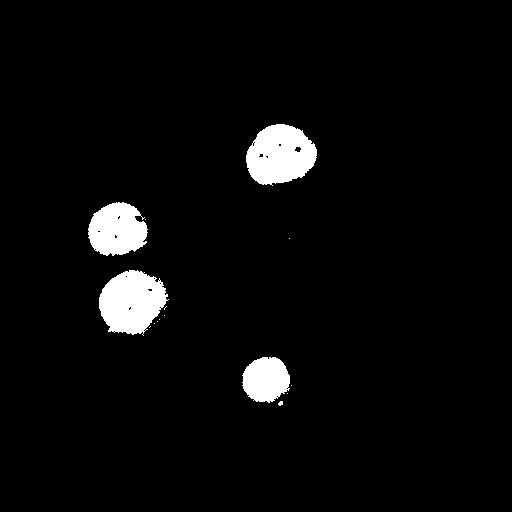

In [98]:
def borrar(img1, img2): # Permite usar a img1 como guía para eliminar pixeles en img2
  (N1,M1) = img1.shape
  (N2,M2) = img2.shape
  img2_copy = img2.copy()
  for i in range(N1):
    for j in range(M1):
      if img1[i,j] == 255.0:
        img2_copy[i,j] = 0
  return img2_copy

def sumar(img1, img2): # Es la unión de las partes iluminadas de img1 y img2
  (N1,M1) = img1.shape
  (N2,M2) = img2.shape
  img2_copy = img2.copy()
  for i in range(N1):
    for j in range(M1):
      if img1[i,j] == 255.0:
        img2_copy[i,j] = 255
  return img2_copy

Seg_G_sum = sumar(Seg_B, Seg_G)
Seg_limpio_R = borrar(Seg_G_sum, Seg_R)
cv2_imshow(Seg_limpio_R)

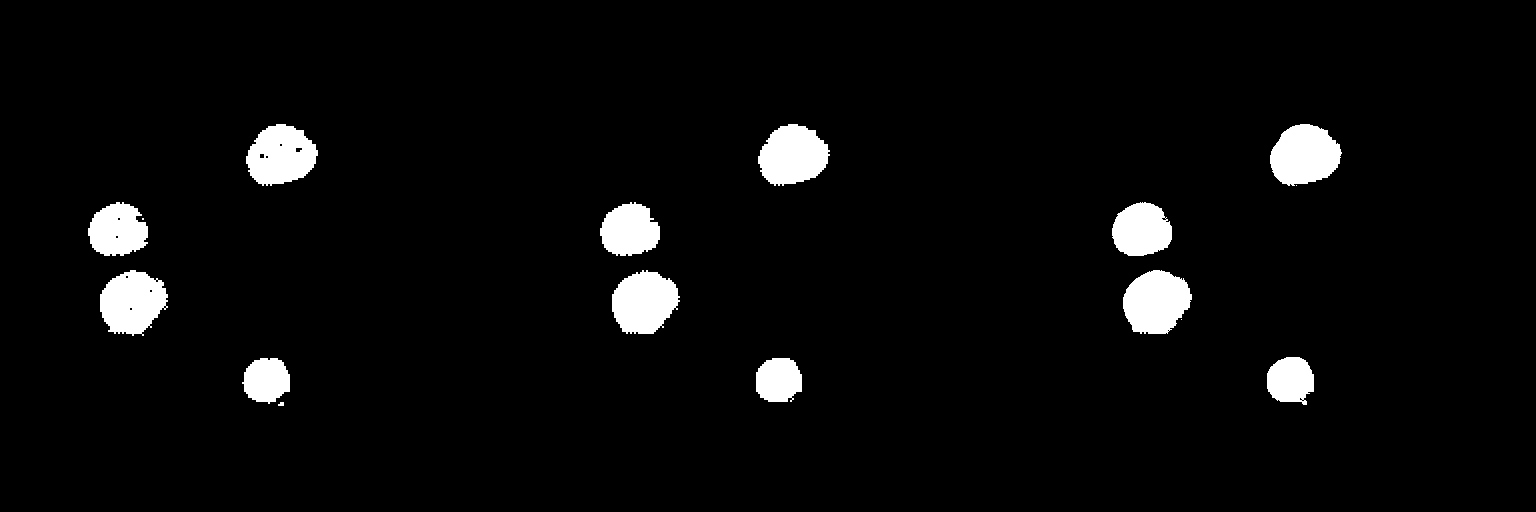

In [99]:
def Rellenar(img,n): # Rellena un pixel según sus vecinos a una distancia de n
  img_cop = img.copy()
  (N,M) = img.shape
  for i in range(n,N-n):
    for j in range(n,M-n):
      if img[i-n,j] == img[i+n,j] and img[i,j] != img[i+n,j]:
        img_cop[i,j] = img[i-n,j]
      if img[i,j-n] == img[i,j+n] and img[i,j] != img[i,j+n]:
        img_cop[i,j] = img[i,j-n]
  return img_cop

def Burrear(img): # En realidad se hace uso del muestreo por pixeles, pero al entregar
  X = img.copy()
  d = 2  # se muestrea cada d pixeles
  (Nx,Mx) = X.shape
  Ny = Nx
  My = Mx
  Y = np.zeros((Ny,My),np.uint8)
  for i in range(Ny):
    for j in range(My):
      ix = int(np.fix(i/d)*d)
      jx = int(np.fix(j/d)*d)
      Y[i,j] = X[ix,jx]
  return Y

blur_seg_R = Burrear(Seg_limpio_R)
relleno_R = Rellenar(blur_seg_R,4)
limpio_R = Rellenar(sumar(relleno_R, Seg_limpio_R),2)
rellenando = np.concatenate((blur_seg_R,relleno_R,limpio_R), axis=1)
cv2_imshow(rellenando)

Comparando el 'antes' y el 'después' de la limpieza realizada por el proceso anterior a counter


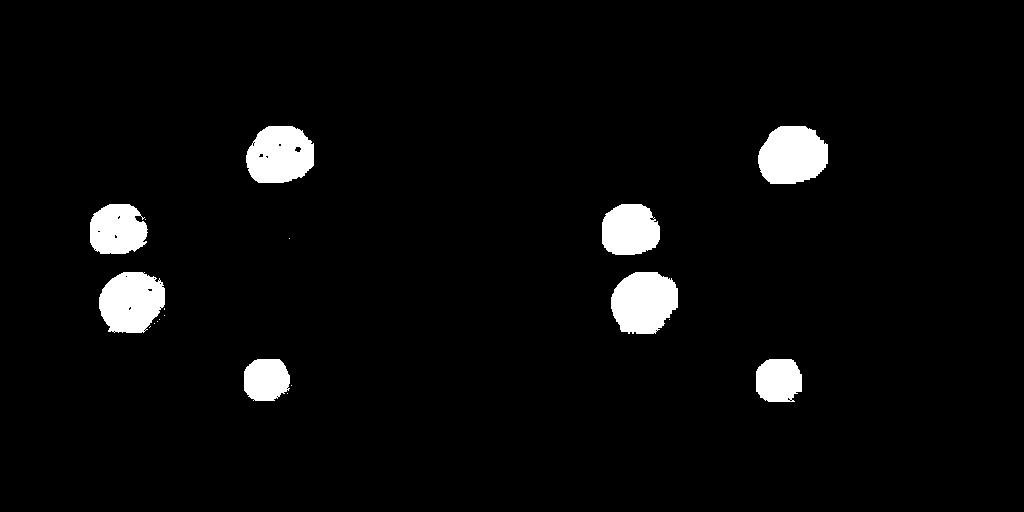

In [100]:
# Utilizo counter para contar la cantidad de pixeles blancos que hay en Seg_R y limpia las filas/columnas que no cumplan con el mínimo
def counter(I, card, minimo):
  # Counter era importante sin el uso de la resta de imágenes pero es mejor dejarlo como un soporte de limpieza
  Img = I.copy()
  (N,M) = Img.shape
  for i in range(N):
    cant = Img[i,:].tolist().count(255.0)
    if cant < minimo:
      Img[i,:] = 0
  for j in range(M):
    cant = Img[:,j].tolist().count(255.0)
    if cant < minimo:
      Img[:,j] = 0
  return Img

Limpieza = counter(limpio_R, 0, 20)
Limpieza_simple = counter(Seg_limpio_R, 0, 20)
comparacion = np.concatenate((Limpieza_simple,Limpieza), axis=1)
print("Comparando el 'antes' y el 'después' de la limpieza realizada por el proceso anterior a counter")
cv2_imshow(comparacion)

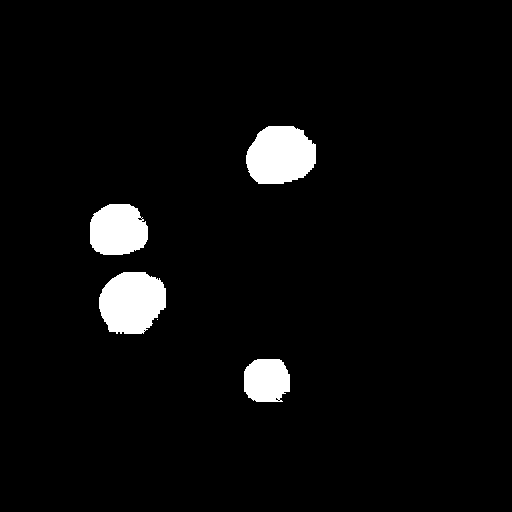

In [101]:
# Resultado final
cv2_imshow(Limpieza)

# 7) Sobreponga un borde azul a los frutos segmentados en la imagen a color

(1 Punto)


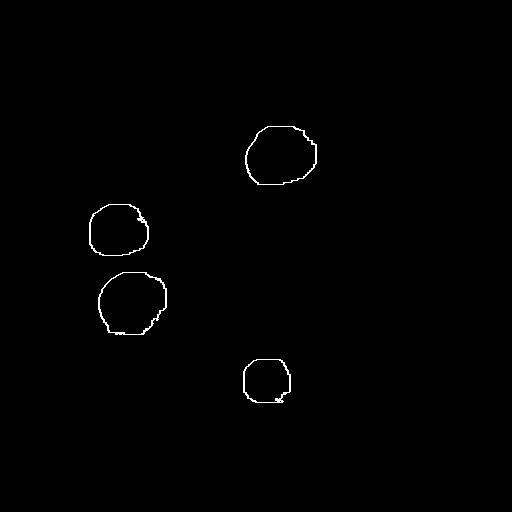

In [102]:
# PREGUNTA 7: ESCRIBA CODIGO AQUI

# Identificación del contorno
Q = Limpieza.copy()
(N,M) = Q.shape
E = np.zeros((N,M),np.uint8)
for i in range(N):
  for j in range(1,M):
    if Q[i,j]!=Q[i,j-1]: 
      E[i,j]   = 1
      E[i,j-1] = 1
for i in range(1,N):
  for j in range(M):
    if Q[i-1,j]!=Q[i,j]: 
      E[i,j]   = 1
      E[i,j-1] = 1
cv2_imshow(E*255)

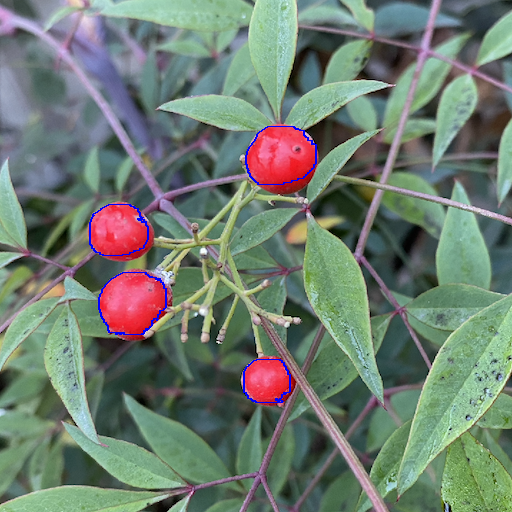

In [103]:
final = berrys.copy()
(N,M) = E.shape
for i in range(N):
  for j in range(M):
    if E[i,j] == 1:
      final[i,j,:] = [255,0,0]
cv2_imshow(final)

# <font color='red'>SUBIR EJERCICIO DE FORMA INDIVIDUAL A GOOGLE CLASSROOM</font> 

<font color='orange'>(subir archivo NumeroAlumnx.ipynb) </font>

# (Class code: khcdh57) 
